In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time module.
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

653

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b48ac97ac693ad65e8d5f617f1b051ed


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 14 | springbok
Processing Record 2 of Set 14 | kavieng
Processing Record 3 of Set 14 | cherskiy
Processing Record 4 of Set 14 | kabompo
Processing Record 5 of Set 14 | port blair
Processing Record 6 of Set 14 | victoria
Processing Record 7 of Set 14 | ushuaia
Processing Record 8 of Set 14 | burewala
Processing Record 9 of Set 14 | hermanus
Processing Record 10 of Set 14 | sioux lookout
Processing Record 11 of Set 14 | esperance
Processing Record 12 of Set 14 | luangwa
Processing Record 13 of Set 14 | klaksvik
Processing Record 14 of Set 14 | busselton
Processing Record 15 of Set 14 | asosa
Processing Record 16 of Set 14 | srikakulam
Processing Record 17 of Set 14 | pilibanga
Processing Record 18 of Set 14 | vaini
Processing Record 19 of Set 14 | grindavik
Processing Record 20 of Set 14 | odweyne
Processing Record 21 of Set 14 | bogalusa
Processing Record 22 of Set 14 | rikitea
Processing Record 23 of

Processing Record 34 of Set 17 | kodiak
Processing Record 35 of Set 17 | puerto el triunfo
Processing Record 36 of Set 17 | lorengau
Processing Record 37 of Set 17 | castro
Processing Record 38 of Set 17 | tiksi
Processing Record 39 of Set 17 | marsa matruh
Processing Record 40 of Set 17 | bandarbeyla
Processing Record 41 of Set 17 | labuan
Processing Record 42 of Set 17 | yerbogachen
Processing Record 43 of Set 17 | warqla
City not found. Skipping...
Processing Record 44 of Set 17 | rajauri
Processing Record 45 of Set 17 | sur
Processing Record 46 of Set 17 | itacoatiara
Processing Record 47 of Set 17 | san quintin
Processing Record 48 of Set 17 | saskylakh
Processing Record 49 of Set 17 | vila franca do campo
Processing Record 50 of Set 17 | bardiyah
Processing Record 1 of Set 18 | acapulco
Processing Record 2 of Set 18 | masuguru
Processing Record 3 of Set 18 | ayan
Processing Record 4 of Set 18 | edgewater
Processing Record 5 of Set 18 | sobolevo
Processing Record 6 of Set 18 | mak

Processing Record 17 of Set 21 | fortuna
Processing Record 18 of Set 21 | beyneu
Processing Record 19 of Set 21 | cayenne
Processing Record 20 of Set 21 | mount gambier
Processing Record 21 of Set 21 | portree
Processing Record 22 of Set 21 | lengshuijiang
Processing Record 23 of Set 21 | luderitz
Processing Record 24 of Set 21 | hirara
Processing Record 25 of Set 21 | haines junction
Processing Record 26 of Set 21 | ardistan
City not found. Skipping...
Processing Record 27 of Set 21 | sunndalsora
Processing Record 28 of Set 21 | tungor
Processing Record 29 of Set 21 | camara de lobos
Processing Record 30 of Set 21 | teahupoo
Processing Record 31 of Set 21 | xinzhi
Processing Record 32 of Set 21 | ladozhskaya
Processing Record 33 of Set 21 | slave lake
Processing Record 34 of Set 21 | camacupa
Processing Record 35 of Set 21 | bloomingdale
Processing Record 36 of Set 21 | ilulissat
Processing Record 37 of Set 21 | jabiru
City not found. Skipping...
Processing Record 38 of Set 21 | ambon

Processing Record 3 of Set 25 | kaili
Processing Record 4 of Set 25 | fengxian
Processing Record 5 of Set 25 | zvishavane
Processing Record 6 of Set 25 | ust-ilimsk
Processing Record 7 of Set 25 | dwarka
Processing Record 8 of Set 25 | peniche
Processing Record 9 of Set 25 | marzuq
Processing Record 10 of Set 25 | danielskuil
Processing Record 11 of Set 25 | poykovskiy
Processing Record 12 of Set 25 | alta floresta
Processing Record 13 of Set 25 | lazaro cardenas
Processing Record 14 of Set 25 | cabo san lucas
Processing Record 15 of Set 25 | gerash
Processing Record 16 of Set 25 | xai-xai
Processing Record 17 of Set 25 | potiskum
Processing Record 18 of Set 25 | pafos
Processing Record 19 of Set 25 | honiara
Processing Record 20 of Set 25 | la rioja
Processing Record 21 of Set 25 | bagotville
Processing Record 22 of Set 25 | sosua
Processing Record 23 of Set 25 | polewali
Processing Record 24 of Set 25 | dong xoai
Processing Record 25 of Set 25 | gornorechenskiy
Processing Record 26 o

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Springbok,-29.66,17.89,74.46,49,37,7.63,ZA,2020-02-19 22:04:03
1,Kavieng,-2.57,150.80,82.87,71,39,8.59,PG,2020-02-19 22:04:03
2,Cherskiy,68.75,161.30,-23.91,94,99,6.22,RU,2020-02-19 22:01:39
3,Kabompo,-13.59,24.20,66.02,95,73,0.34,ZM,2020-02-19 22:04:04
4,Port Blair,11.67,92.75,79.54,85,44,12.64,IN,2020-02-19 22:03:24
5,Victoria,22.29,114.16,63.00,63,20,5.82,HK,2020-02-19 22:03:05
6,Ushuaia,-54.80,-68.30,48.20,87,75,27.51,AR,2020-02-19 22:00:48
7,Burewala,30.17,72.65,57.24,46,0,11.41,PK,2020-02-19 22:04:06
8,Hermanus,-34.42,19.23,66.00,94,0,3.00,ZA,2020-02-19 22:00:37
9,Sioux Lookout,50.10,-91.92,1.40,54,5,9.17,CA,2020-02-19 22:00:42


In [8]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Springbok,ZA,2020-02-19 22:04:03,-29.66,17.89,74.46,49,37,7.63
1,Kavieng,PG,2020-02-19 22:04:03,-2.57,150.80,82.87,71,39,8.59
2,Cherskiy,RU,2020-02-19 22:01:39,68.75,161.30,-23.91,94,99,6.22
3,Kabompo,ZM,2020-02-19 22:04:04,-13.59,24.20,66.02,95,73,0.34
4,Port Blair,IN,2020-02-19 22:03:24,11.67,92.75,79.54,85,44,12.64
...,...,...,...,...,...,...,...,...,...
596,Druzhba,UA,2020-02-19 22:08:51,52.04,33.95,34.00,87,97,5.41
597,Uddevalla,SE,2020-02-19 22:08:52,58.35,11.94,39.99,100,0,6.93
598,Yeppoon,AU,2020-02-19 22:08:52,-23.13,150.73,84.20,70,0,1.07
599,Ekibastuz,KZ,2020-02-19 22:08:53,51.67,75.37,24.28,80,88,21.21


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

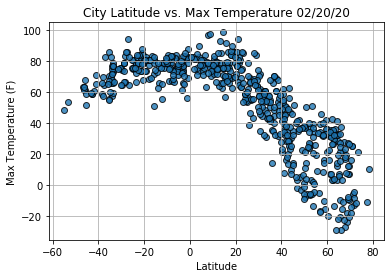

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

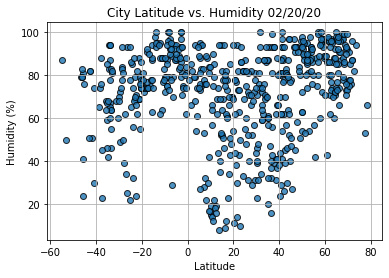

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

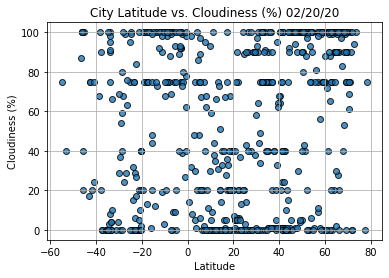

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

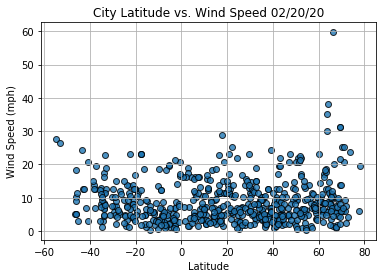

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

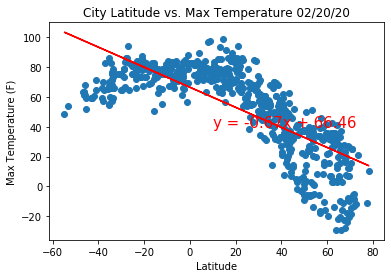

In [15]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats* slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (F)")
plt.show()

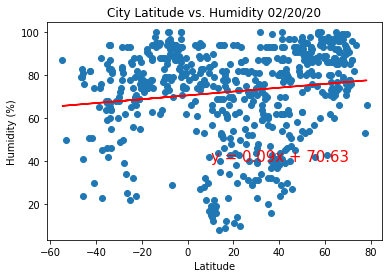

In [16]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, humidity)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats* slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,humidity)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.show()

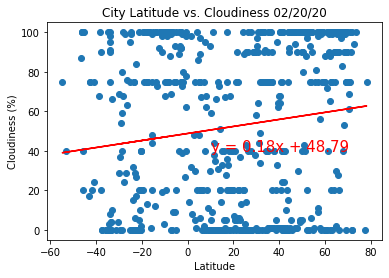

In [17]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats* slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,cloudiness)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.show()

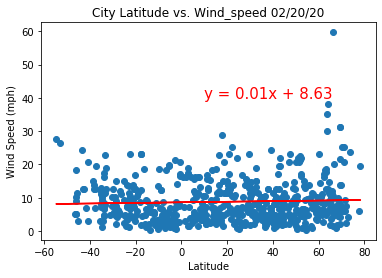

In [18]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept. 
regress_values = lats* slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title(f"City Latitude vs. Wind_speed "+ time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (mph)")
plt.show()

In [19]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2020-02-19 22:04:08
Lat                        -33.65
Lng                        115.33
Max Temp                       66
Humidity                       46
Cloudiness                      0
Wind Speed                  17.38
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
596     True
597     True
598    False
599     True
600    False
Name: Lat, Length: 601, dtype: bool

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Cherskiy,RU,2020-02-19 22:01:39,68.75,161.30,-23.91,94,99,6.22
4,Port Blair,IN,2020-02-19 22:03:24,11.67,92.75,79.54,85,44,12.64
5,Victoria,HK,2020-02-19 22:03:05,22.29,114.16,63.00,63,20,5.82
7,Burewala,PK,2020-02-19 22:04:06,30.17,72.65,57.24,46,0,11.41
9,Sioux Lookout,CA,2020-02-19 22:00:42,50.10,-91.92,1.40,54,5,9.17


In [23]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Springbok,ZA,2020-02-19 22:04:03,-29.66,17.89,74.46,49,37,7.63
1,Kavieng,PG,2020-02-19 22:04:03,-2.57,150.80,82.87,71,39,8.59
3,Kabompo,ZM,2020-02-19 22:04:04,-13.59,24.20,66.02,95,73,0.34
6,Ushuaia,AR,2020-02-19 22:00:48,-54.80,-68.30,48.20,87,75,27.51
8,Hermanus,ZA,2020-02-19 22:00:37,-34.42,19.23,66.00,94,0,3.00


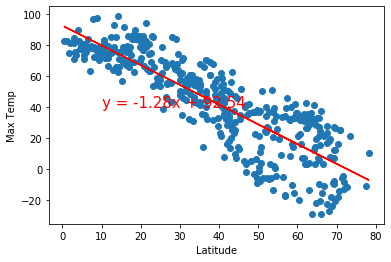

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(10,40))

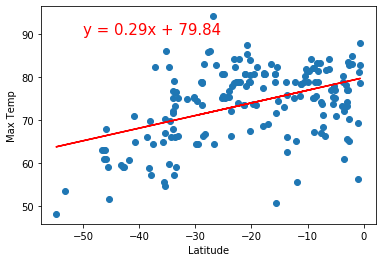

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Maximum Temperature', 'Max Temp',(-50,90))

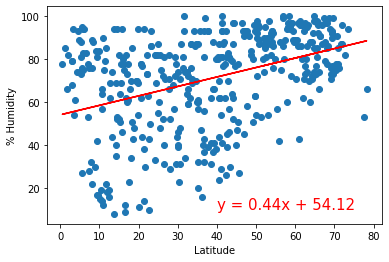

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Humidity', '% Humidity',(40,10))

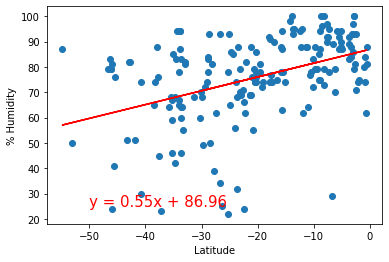

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Humidity', '% Humidity',(-50,25))

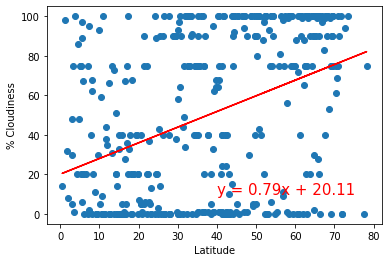

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(40,10))

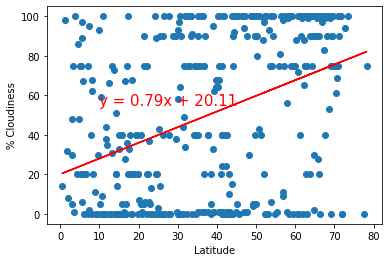

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n\
                    for % Cloudiness', '% Cloudiness',(10,55))

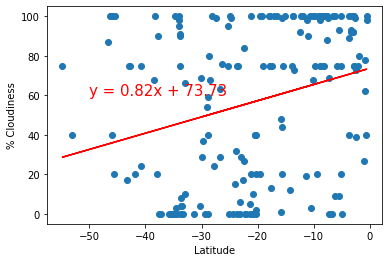

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for % Cloudiness', '% Cloudiness',(-50,60))

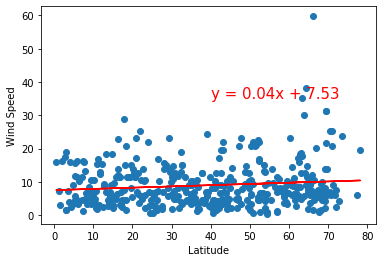

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(40,35))

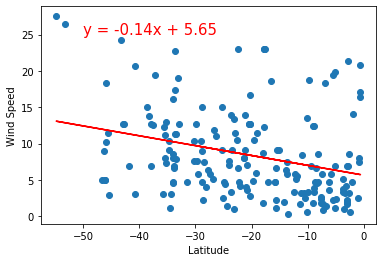

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n\
                        for Wind Speed', 'Wind Speed',(-50,25))